# Sensitivity Analysis of Shelter Outcome Metrics Using Shelter Animals Count Data

## 1. Introduction

### This notebook analyzes aggregated Shelter Animals Count (SAC) data to evaluate how sensitive commonly used shelter outcome metrics are to definitional choices. The analysis focuses on cat outcomes and emphasizes methodological transparency over performance evaluation.

## 2. Data Ingestion

### The raw SAC export is provided as an Excel file with presentation-oriented-formatting. The dateset is loaded directly without modification to preserve the original structure.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df_raw = pd.read_excel('sac_2yr_aggregate_24_23.xlsx', header=1)

## 3. Data Cleaning and Restructuring

### The raw SAC export uses a presentation-style header. This step restructures The dataset so that outcome categories are represented as explicit column names. The analysis is restricted to cat outcomes only, as species-level comparisons are outside the scope of this project.

In [15]:
cat_columns = ["State",
                 "Community Intakes",
                 "Year",
                 "Org Count",
                 "Total Outcomes.1",
                 "Adoption Total.1",
                 "Returned To Owner Total.1",
                 "Transferred Out Total.1",
                 "Died In Care Total.1",
                 "Shelter Euthanasia Total.1",
]

df_cats = df_raw[cat_columns].copy()

### Column Standardization

#### Column names are standardized to snake_case to improve readability and support consistent downstream analysis.

In [16]:
df_cats = df_cats.rename(columns={
    "State": "state",
    "Year": "year",
    "Org Count": "org_count",
    "Total Outcomes.1": "total_outcomes",
    "Adoption Total.1": "adoption_total",
    "Returned To Owner Total.1": "returned_to_owner_total",
    "Transferred Out Total.1": "transferred_out_total",
    "Died In Care Total.1": "died_in_care_total",
    "Shelter Euthanasia Total.1": "shelter_euthanasia_total",
})

### Data Validation 

#### Basic validation checks are performed to ensure internal consitency of outcome totals before metric calculation.

In [17]:
df_cats.describe()

,Community Intakes,year,org_count,total_outcomes,adoption_total,returned_to_owner_total,transferred_out_total,died_in_care_total,shelter_euthanasia_total
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,57059.911765,2023.500000,233.098039,65373.784314,42172.784314,1794.921569,7374.176471,1830.000000,5472.803922
std,71307.393483,0.502469,243.380422,72113.817527,44260.767322,1849.583152,9083.821621,2226.990977,7421.931712
min,2874.000000,2023.000000,13.000000,6723.000000,5203.000000,155.000000,192.000000,121.000000,261.000000
25%,18166.750000,2023.000000,73.500000,23231.750000,13990.250000,727.250000,1789.500000,549.750000,1631.250000
50%,41267.000000,2023.500000,185.000000,53601.500000,31067.000000,1372.500000,5642.000000,1441.500000,4263.500000
75%,67960.500000,2024.000000,325.500000,78787.750000,54947.500000,2010.000000,8454.750000,2184.250000,6042.500000
max,382387.000000,2024.000000,1387.000000,406459.000000,251400.000000,11279.000000,49948.000000,12413.000000,49691.000000


## 4. Metric Definitons 

#### Baseline definitons of adoption rate and live release rate are calculated using SAC-reported outcome totals. Metric definitions are implemented directly in code to support reproducibility and sensitivity analysis.

In [18]:
def calculate_adoption_rate(df):
    return df['adoption_total'] / df['total_outcomes']

def calculate_live_release_rate(df):
    return (df['adoption_total'] + df['returned_to_owner_total']) / df['total_outcomes']

df_cats['adoption_rate'] = calculate_adoption_rate(df_cats)
df_cats['live_release_rate'] = calculate_live_release_rate(df_cats)

df_cats.head()

,state,Community Intakes,year,org_count,total_outcomes,adoption_total,returned_to_owner_total,transferred_out_total,died_in_care_total,shelter_euthanasia_total,adoption_rate,live_release_rate
0,AK,9278,2023,40,8404,5203,509,1024,164,1069,0.619110,0.679676
1,AK,8823,2024,40,8669,5286,480,905,200,1147,0.609759,0.665129
2,AL,77306,2023,200,49146,28749,1124,5536,1424,5877,0.584971,0.607842
3,AL,72057,2024,200,48570,28530,1232,5553,1484,6131,0.587400,0.612765
4,AR,52190,2023,193,36341,21262,989,5948,1007,3240,0.585069,0.612284


#### Alternate definitions of adoption rate and live release rate are calculated by excluding cats that are transferred out. 

In [19]:
def calculate_adoption_rate_excluding_transfers(df):
    adjusted_outcomes = df['total_outcomes'] - df['transferred_out_total']
    adjusted_outcomes = adjusted_outcomes.replace(0, pd.NA)
    return df['adoption_total'] / adjusted_outcomes

def calculate_live_release_rate_excluding_transfers(df):
    adjusted_outcomes = df['total_outcomes'] - df['transferred_out_total']
    adjusted_outcomes = adjusted_outcomes.replace(0, pd.NA)
    return (df['adoption_total'] + df['returned_to_owner_total']) / adjusted_outcomes

df_cats['adoption_rate_excl_transfers'] = calculate_adoption_rate_excluding_transfers(df_cats)
df_cats['live_release_rate_excl_transfers'] = calculate_live_release_rate_excluding_transfers(df_cats)

df_cats.head()

,state,Community Intakes,year,org_count,total_outcomes,adoption_total,returned_to_owner_total,transferred_out_total,died_in_care_total,shelter_euthanasia_total,adoption_rate,live_release_rate,adoption_rate_excl_transfers,live_release_rate_excl_transfers
0,AK,9278,2023,40,8404,5203,509,1024,164,1069,0.619110,0.679676,0.705014,0.773984
1,AK,8823,2024,40,8669,5286,480,905,200,1147,0.609759,0.665129,0.680835,0.742658
2,AL,77306,2023,200,49146,28749,1124,5536,1424,5877,0.584971,0.607842,0.659230,0.685003
3,AL,72057,2024,200,48570,28530,1232,5553,1484,6131,0.587400,0.612765,0.663226,0.691866
4,AR,52190,2023,193,36341,21262,989,5948,1007,3240,0.585069,0.612284,0.699569,0.732109


## 5. Sensitivity Analysis - Baseline vs. Alternate Metric Definitions

### This section compares baseline adoption rate and live release rate definitions against alternate versions that exclude transferred-out cats from total outcomes.
### The goal is to quantify how much commonly reported shelter metrics change under a plausible definitional adjustment, not to evaluate shelter performance.
### Observed differences are interpreted as evidence of metric sensitivity to outcome classification.

In [20]:
df_cats['adoption_rate_diff'] = df_cats['adoption_rate_excl_transfers'] - df_cats['adoption_rate']

df_cats['adoption_rate_pct_change'] = df_cats['adoption_rate_diff'] / df_cats['adoption_rate']

df_cats['live_release_rate_diff'] = df_cats['live_release_rate_excl_transfers'] - df_cats['live_release_rate']

df_cats['live_release_rate_pct_change'] = df_cats['live_release_rate_diff'] / df_cats['live_release_rate']

In [21]:
summary_year = df_cats.groupby('year', as_index=False).agg({
    'adoption_rate': 'mean',
    'adoption_rate_excl_transfers': 'mean',
    'adoption_rate_pct_change': 'mean',
    'live_release_rate': 'mean',
    'live_release_rate_excl_transfers': 'mean',
    'live_release_rate_pct_change': 'mean',
})

In [22]:
summary_year

,year,adoption_rate,adoption_rate_excl_transfers,adoption_rate_pct_change,live_release_rate,live_release_rate_excl_transfers,live_release_rate_pct_change
0,2023,0.655382,0.734428,0.125146,0.684632,0.767225,0.125146
1,2024,0.664810,0.740765,0.118019,0.695975,0.775523,0.118019


## 6. Results

### This section presents the results of the sensitivity analysis by comparing baseline and alternate defintitions of adoption rate and live release rate for cats.
### Results are reported at an aggregated level and are intended to illustrate how metric values change when transferred-out outcomes are excluded, rather than to evaluate shelter performance or temporal trends.

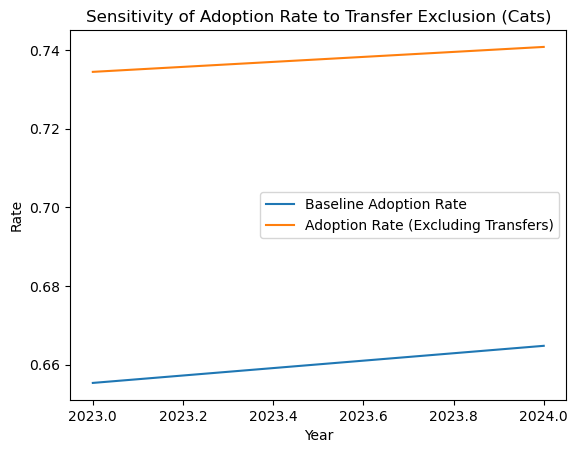

In [23]:
plt.plot(summary_year['year'], summary_year['adoption_rate'], label='Baseline Adoption Rate')
plt.plot(summary_year['year'], summary_year['adoption_rate_excl_transfers'], label='Adoption Rate (Excluding Transfers)')

plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Sensitivity of Adoption Rate to Transfer Exclusion (Cats)')
plt.legend()
plt.show()

#### Excluding transferred-out cats increases the measured adoption rate across both years, indicating that the metric is sensitive to how transfers are classified in total outcomes.
#### The magnitude of change suggests that shelters or systems with higher transfer activity may report materially different adoption rates under alternate definitions.
#### This reinforces the importance of transparent metric definitions when comparing or interpreting shelter outcome statistics.

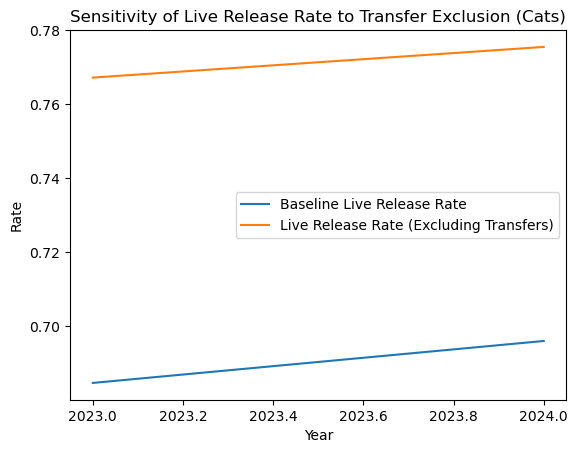

In [24]:
plt.plot(summary_year['year'], summary_year['live_release_rate'], label='Baseline Live Release Rate')
plt.plot(summary_year['year'], summary_year['live_release_rate_excl_transfers'], label='Live Release Rate (Excluding Transfers)')

plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Sensitivity of Live Release Rate to Transfer Exclusion (Cats)')
plt.legend()
plt.show()

#### Live release rate shows a similar directional sensitivity when transferred-out cats are excluded from total outcomes.
#### The change in LRR indicates that transfers materially affect the classification of live versus terminal outcomes under common definitions. 
#### As with adoption rate, this suggests that LRR values are not definition-invariant and should be interpreted in the context of how outcomes are grouped. 

## 7. Limitations and Notes

#### This analysis relies on aggregate-level data, which limits the ability to examine relationships at the inidividual shelter or animal level. All values represent total aggregated across organizations within each state.

#### The analysis only utilizes two years of data (2023-2024). While the definitional differences in outcome metrics are observable, a longer time span would improve stability and help distinguish structural sensitivity from short-term variation.

#### Outcome metrics are calculated without normalization for intake volume or intake composition. As a result, observed differences may reflect underlying intake patterns rather than changes in shelter practices or performance.

#### This analysis is descriptive and does not support causal inference. Because the data are aggregated and do not include information on shelter capacity, intake conditions, or policy changes, observed differences cannot be interpreted as causal effects.

### Next Steps

#### Future work could stratify the sensitivity analysis by state rather than relying on national aggregates to assess whether the impact of exluding specific outcome categories, such as transfers, is consistent across jurisdictions. 

#### Expanding the analysis to include additional years of data or incorporating an alternative longitudinal dataset would improve robustness and allow for more stable comparisons.

#### Intake-adjusted metrics could be explored to better contextualize outcome rates relative to intake volume and intake composition.

#### A parallel analysis could be conducted for dogs to assess whether metric sensitivity patterns are consistent across species.